#### Q1

(a)<br>
$\gamma(k-1) = Cov\{\phi_1(Y_{t-1}-\mu)+\phi_2(Y_{t-2}-\mu)+\epsilon_t, Y_{t+(k-1)}\}$<br>
$\gamma(k-2) = Cov\{\phi_1(Y_{t-1}-\mu)+\phi_2(Y_{t-2}-\mu)+\epsilon_t, Y_{t+(k-2)}\}$<br>
$\gamma(k) = Cov\{\phi_1(Y_{t-1}-\mu)+\phi_2(Y_{t-2}-\mu)+\epsilon_t, Y_{t+k}\}$<br>
$\because Y_{t+k} - \mu = \phi_1(Y_{t+(k-1)} - \mu) + \phi_2(Y_{t+(k-2)} - \mu) + \epsilon_{t+k}$<br>
$\therefore \gamma(k) = Cov\{\phi_1(Y_{t-1}-\mu)+\phi_2(Y_{t-2}-\mu)+\epsilon_t, \phi_1(Y_{t+(k-1)} - \mu) + \phi_2(Y_{t+(k-2)} - \mu) + \epsilon_{t+k}\}$<br>
$\therefore \gamma(k) = \phi_1\gamma(k-1) + \phi_2\gamma(k-2)$<br>
$\therefore \rho(k)=\phi_1\rho(k-1)+\phi_2\rho(k-2)$<br>

(b)<br>
$\rho(1)=\phi_1\rho(0)+\phi_2\rho(-1)=\phi_1+\phi_2\rho(1)$<br>
$\rho(2)=\phi_1\rho(0)\rho(1)+\phi_2\rho(0)=\phi_1\rho(1)+\phi_2$<br>
$$
\begin{pmatrix}
\rho(1) \\
\rho(2) 
\end{pmatrix}=\begin{pmatrix}
1 & \rho(1) \\
\rho(1) & 1 
\end{pmatrix}\begin{pmatrix}
\phi_1 \\
\phi_2 
\end{pmatrix}
$$

(c)<br>
$$
\begin{pmatrix}
0.4 \\
0.2 
\end{pmatrix}=\begin{pmatrix}
1 & 0.4 \\
0.4 & 1 
\end{pmatrix}\begin{pmatrix}
\phi_1 \\
\phi_2 
\end{pmatrix}
$$
$
\because \begin{pmatrix}
1 & 0.4 \\
0.4 & 1 
\end{pmatrix}^{-1}=\begin{pmatrix}
\frac{1}{0.84} & \frac{-0.4}{0.84} \\
\frac{-0.4}{0.84} & \frac{1}{0.84} 
\end{pmatrix}
$<br>
$\therefore
\begin{pmatrix}
\frac{1}{0.84} & \frac{-0.4}{0.84} \\
\frac{-0.4}{0.84} & \frac{1}{0.84} 
\end{pmatrix}\begin{pmatrix}
0.4 \\
0.2 
\end{pmatrix}=\begin{pmatrix}
\phi_1 \\
\phi_2 
\end{pmatrix}=\begin{pmatrix}
\frac{8}{21} \\
\frac{1}{21}
\end{pmatrix}
$<br>
$\therefore \rho(3)=\frac{8}{21} 0.4 + \frac{1}{21} 0.2=\frac{17}{105}\approx0.162$

Q2

d=1 is recommended. <br>
We could observe that past effects could not die out when d=0 according to ACF graph. All lags are significant. When d=1, in the left graph, we could observe stationarity and only lag=1 matters in ACF plot, for which the process is ergodic so stationary. When d=2, it is over differencing, no improvement on ACF and more past effects impact the results.

Q5

$
x_t=\phi_1L x_t + \phi_2L^2 x_t + \epsilon_t
$<br>
$
x_t(1-\phi_1L-\phi_2L^2)=\epsilon_t=x_t(1-\lambda_1L)(1-\lambda_2L)
$<br>
if real roots $\phi_1^2 + 4\phi_2 > 0$<br>
if $\phi_2 < 0$<br>
$\phi_1+\phi_2 < 1, \frac{\phi_1}{-2\phi_2} > 1$<br>
if $\phi_2 > 0$<br>
$\phi_1+\phi_2 < 1, -\phi_1+\phi_2 < 1$<br>
if complex roots $\phi_1^2 + 4\phi_2 < 0$<br>
$1 < \phi_2 < 0$<br>


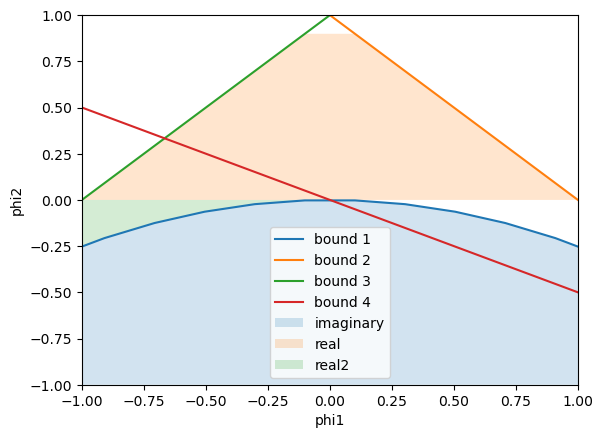

In [66]:
def f1(x):
   return -x**2/4
def f2(x):
   return 1-x
def f3(x):
   return 1+x
def f4(x):
   return -x/2
def f5(x):
   return -1
def f6(x):
   return 0
x = np.linspace(-10, 10, 100)

plt.plot(x, f1(x), label="bound 1")
plt.plot(x, f2(x), label="bound 2")
plt.plot(x, f3(x), label="bound 3")
plt.plot(x, f4(x), label="bound 4")
plt.ylim((-1,1))
plt.xlim((-1,1))
plt.xlabel("phi1")
plt.ylabel("phi2")
plt.fill_between(x, f1(x), f5(x), alpha=0.2, label="imaginary")
plt.fill_between(x, 0, np.min([f2(x), f3(x)], axis=0), alpha=0.2, label="real")
plt.fill_between(x, f1(x), np.min([f2(x), f4(x),np.zeros(len(x))], axis=0), where=np.min([f2(x), f4(x),np.zeros(len(x))], axis=0)>f(x), alpha=0.2, label="real2")
plt.legend()
plt.show()

Q6

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
def generate_ar_1_process(T, white_noise_mu, white_noise_sigma):
    paths = {str(phi): [0] for phi in [0.9,0.99,0.99999,1.0]}
    epsilons = np.random.normal(white_noise_mu, white_noise_sigma, T)
    for i in range(T):
        for phi in [0.9,0.99,0.99999,1.0]:
            paths[str(phi)].append(paths[str(phi)][-1]*phi+epsilons[i])
    return paths

def plot_sample_paths(T):
    paths = generate_ar_1_process(T, 0, 1)
    for phi in [0.9,0.99,0.99999,1.0]:
        plt.plot(paths[str(phi)], label=f"phi={phi}")
    plt.legend()
    plt.title(f"T={T}")
    plt.ylim((-100,100))
    plt.show()
    for phi in [0.9,0.99,0.99999,1.0]:
        print(f"population mean=0 and sigma={np.sqrt(1/(1-phi**2)) if phi != 1 else 'NA'}")
        print(f"phi={phi}", "|mean=", np.mean(paths[str(phi)]),"|std=", np.std(paths[str(phi)]))
        print()

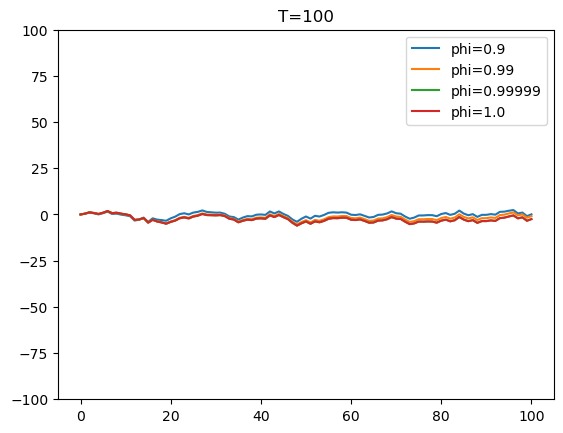

population mean=0 and sigma=2.294157338705618
phi=0.9 |mean= -0.2554809810395292 |std= 1.3981810683292013

population mean=0 and sigma=7.088812050083353
phi=0.99 |mean= -1.6335185620333923 |std= 1.52037130833839

population mean=0 and sigma=223.60735676962474
phi=0.99999 |mean= -2.390718846395494 |std= 1.6733998567231976

population mean=0 and sigma=NA
phi=1.0 |mean= -2.3916915468091884 |std= 1.6737097499342868



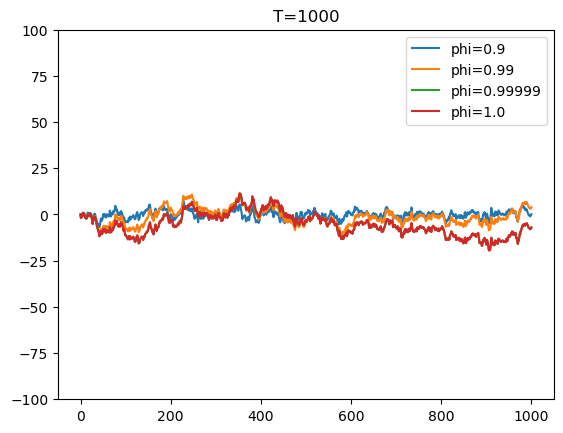

population mean=0 and sigma=2.294157338705618
phi=0.9 |mean= -0.07191829594127061 |std= 2.0841286648149433

population mean=0 and sigma=7.088812050083353
phi=0.99 |mean= -1.0913798861932569 |std= 4.29287751405582

population mean=0 and sigma=223.60735676962474
phi=0.99999 |mean= -5.375117030343847 |std= 6.1122916444780175

population mean=0 and sigma=NA
phi=1.0 |mean= -5.3940344338896615 |std= 6.119270093762526



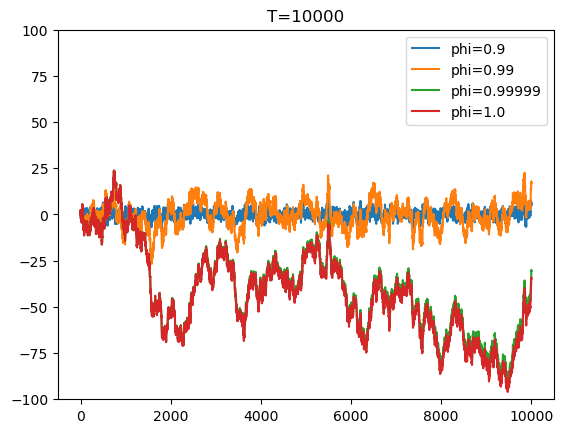

population mean=0 and sigma=2.294157338705618
phi=0.9 |mean= -0.03909774041225354 |std= 2.3305219629044123

population mean=0 and sigma=7.088812050083353
phi=0.99 |mean= -0.5142813531187237 |std= 7.0219394262610875

population mean=0 and sigma=223.60735676962474
phi=0.99999 |mean= -40.86896161338546 |std= 23.379288991602646

population mean=0 and sigma=NA
phi=1.0 |mean= -42.43261072038302 |std= 24.232879301768207



In [46]:
plot_sample_paths(100)
plot_sample_paths(1000)
plot_sample_paths(10000)

We could observe that as $\phi$ gets close to 1, the stationarity would worsen, as is suggested by the increasing deviation of sample mean and standard deviation against population statistics. And as T increases, due to larger sample, with $\phi$ further from 1, sample moments gets closer to population, as is shown in T=10,000 case.